**impelementation for zomato data analysis using pyhton**

step 1: importing necessary python libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

step 2: creating the data frame

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/Zomato-data-.csv")
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


step 3: Data cleaning and preparation

In [ ]:
def yourate(value):
   value=str(value).split('/')
   value=value[0];
   return float(value)
df["rate"]=df["rate"].apply(yourate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


**2. Getting summary of the dataframe use df.info().**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


3. checking for missing or null values to identify any data gaps

In [ ]:
print(df.isnull().sum())

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


step 4:exploring restaurant types

1. let's see the listed_in(type)column

Text(0.5, 0, 'type of restaurant')

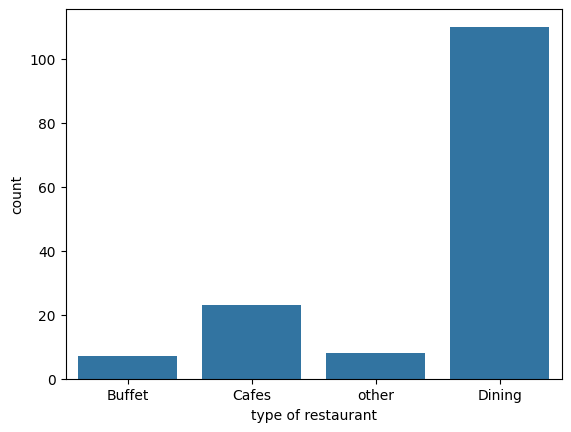

In [ ]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of restaurant")

2. votes by restaurantType

Here we get the count of votes for each category.

Text(0, 0.5, 'votes')

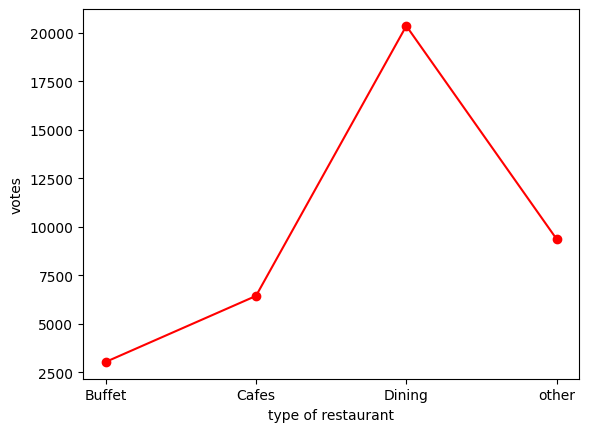

In [ ]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c='red', marker='o')
plt.xlabel('type of restaurant')
plt.ylabel('votes')


conclusion: during restaurants are preferred by a large number of indivi

# step 5: identify the most voted restaurant

In [ ]:
# find the restaurant with the highest nnmber of votes
most_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == most_votes],'name'

print('restaurant(s) with the maximun votes:')
print(restaurant_with_max_votes)

restaurant(s) with the maximun votes:
(                 name online_order book_table  rate  votes  \
38  Empire Restaurant          Yes         No   4.4   4884   

    approx_cost(for two people) listed_in(type)  
38                          750           other  , 'name')


**step 6: Online Order**

Exploring the online_order column to see how many restaurants accept online orders.

<Axes: xlabel='online_order', ylabel='count'>

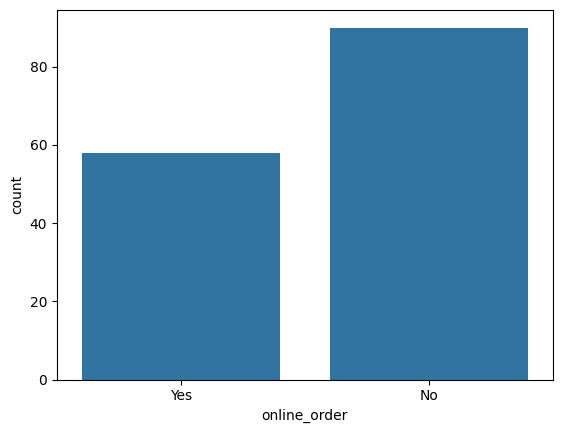

In [ ]:
sns.countplot(x=df['online_order'])

Conclusion: This suggests that a majority of the restaurants do not accept online orders.

**Step 7: Analyze Ratings**

Checking the distribution of ratings from the rate column.

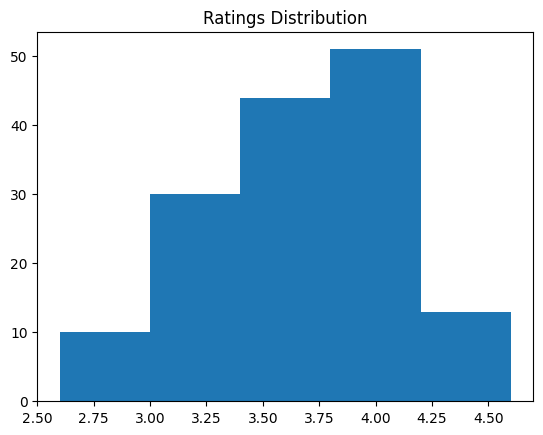

In [ ]:
plt.hist(df['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

**Step 8: Approximate Cost for Couples**

Analyze the approx_cost(for two people) column to find the preferred price range.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

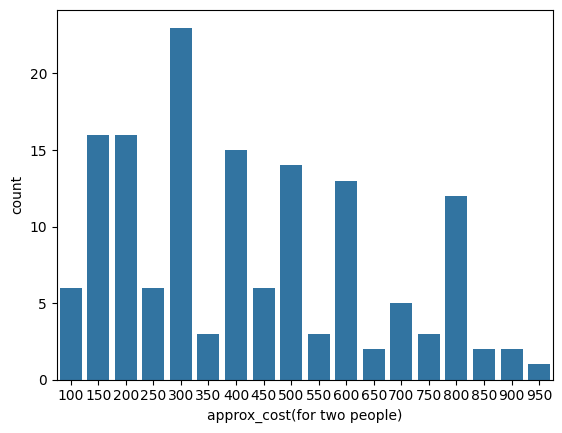

In [ ]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

**Step 9: Ratings Comparison - Online vs Offline Orders**

Compare ratings between restaurants that accept online orders and those that don't.

<Axes: xlabel='online_order', ylabel='rate'>

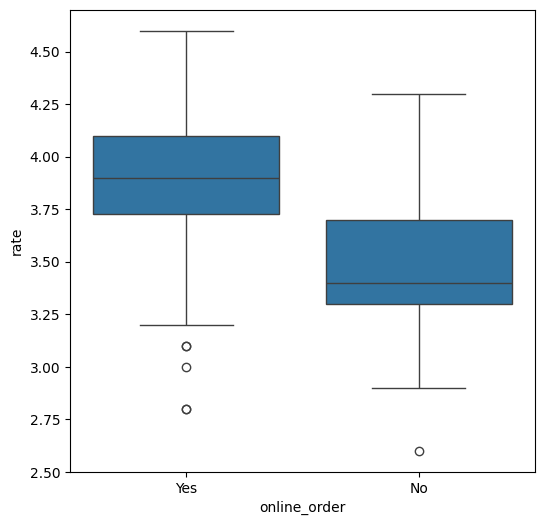

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

Conclusion: Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.

**Step 10: Order Mode Preferences by Restaurant Type**


Find the relationship between order mode (online_order) and restaurant type (listed_in(type)).

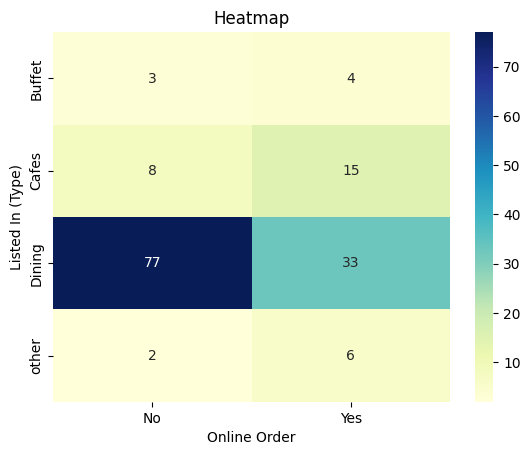

In [ ]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

# we can say that dining restaurants primarily accept offline orders whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes.